In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url

In [2]:
!pip install fastinference

In [9]:
! pip install kaggle

     |████████████████████████████████| 58 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 11.8 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=f5e9ea4d47218a4f30099e2ecef2efab24974b8e8d748cd0120cc5eddd7d4dcc
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset

100%|███████████████████████████████████████▉| 330M/330M [00:15<00:00, 22.3MB/s]
100%|████████████████████████████████████████| 330M/330M [00:15<00:00, 22.8MB/s]


In [14]:
from zipfile import ZipFile
zip = ZipFile('face-mask-12k-images-dataset.zip')
zip.extractall()

In [15]:
path=('Face Mask Dataset/Train')

In [16]:
fns=get_image_files(path)
len(fns)

10000

In [24]:
dlb=DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [40]:
dlb1=DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
item_tfms=Resize(224)
)

In [42]:
dls=dlb.dataloaders(path, batch_size=10)
dls1=dlb1.dataloaders(path, batch_size=10)


In [21]:
dls.vocab

['WithMask', 'WithoutMask']

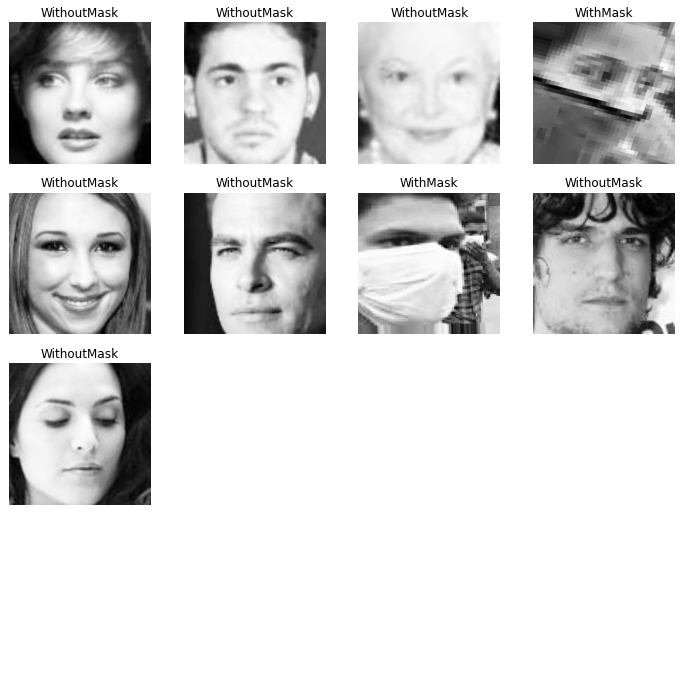

In [43]:
dls1.show_batch(cmap='Greys_r',nrows=4,ncols=4)

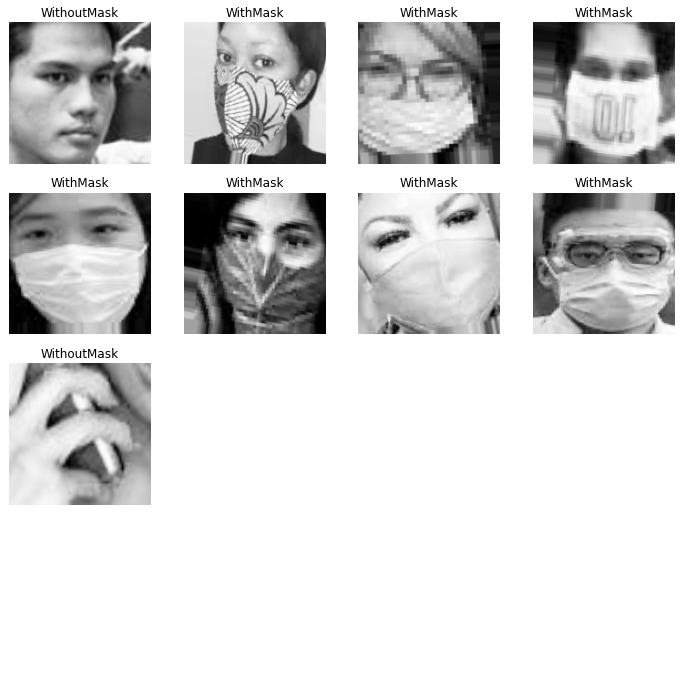

In [44]:
dls.show_batch(cmap='Greys_r',nrows=4,ncols=4)

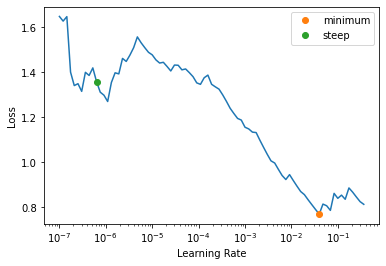

In [46]:
model=vision_learner(dls1,vgg16_bn,metrics=error_rate)
lr_min,lr_steep=model.lr_find(suggest_funcs=(minimum,steep))

In [47]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 3.98e-03, steepest point: 6.31e-07


In [48]:
model.fit_one_cycle(10,lr_max=slice(1e-05,3.98e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.169103,0.045498,0.015500,04:34
1,0.151444,0.022317,0.005000,04:36
2,0.085494,0.014296,0.004500,04:36
3,0.081144,0.012333,0.002500,04:35
4,0.072930,0.009748,0.002500,04:35
5,0.126169,0.012445,0.002500,04:36
6,0.034980,0.008483,0.003000,04:35
7,0.077442,0.004663,0.001500,04:36
8,0.051411,0.008041,0.002000,04:36
9,0.039590,0.007072,0.002000,04:36


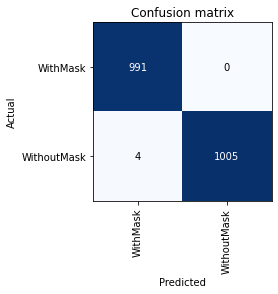

In [50]:
cm=ClassificationInterpretation.from_learner(model)
cm.plot_confusion_matrix()

In [57]:
model.export()

In [56]:
model.predict('test.jpg')

('WithMask', TensorBase(0), TensorBase([1.0000e+00, 1.6651e-10]))

In [58]:
path=Path()
path.ls(file_exts='maskModel.pkl')

(#0) []